In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [27]:
column_names = [
    "Frequency",
    "Angle of attack",
    "Chord length",
    "Free-stream velocity",
    "Suction side displacement thickness",
    "Sound pressure level"
]

df = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None, names=column_names)


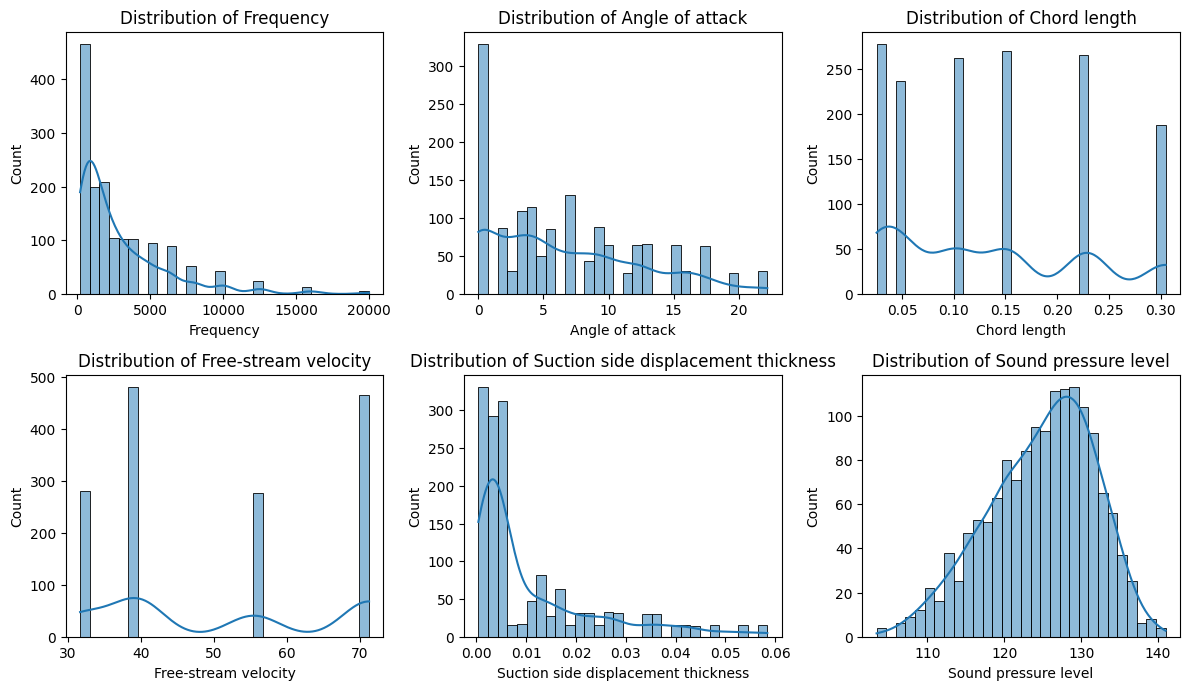

In [28]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

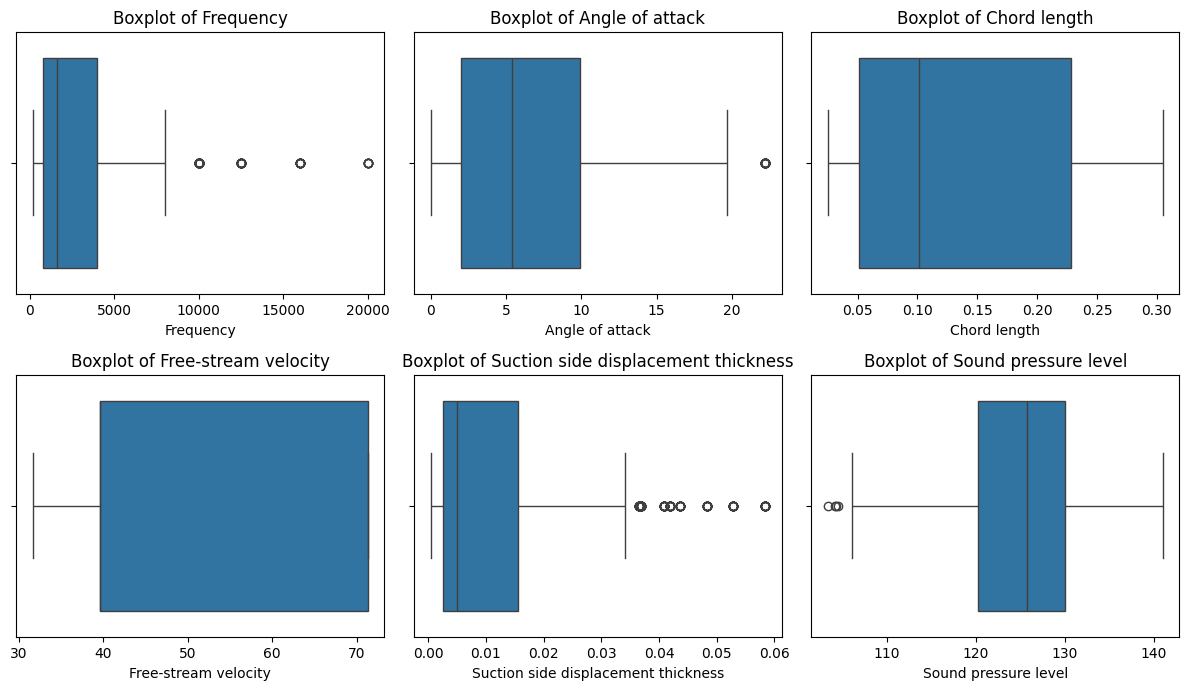

In [29]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

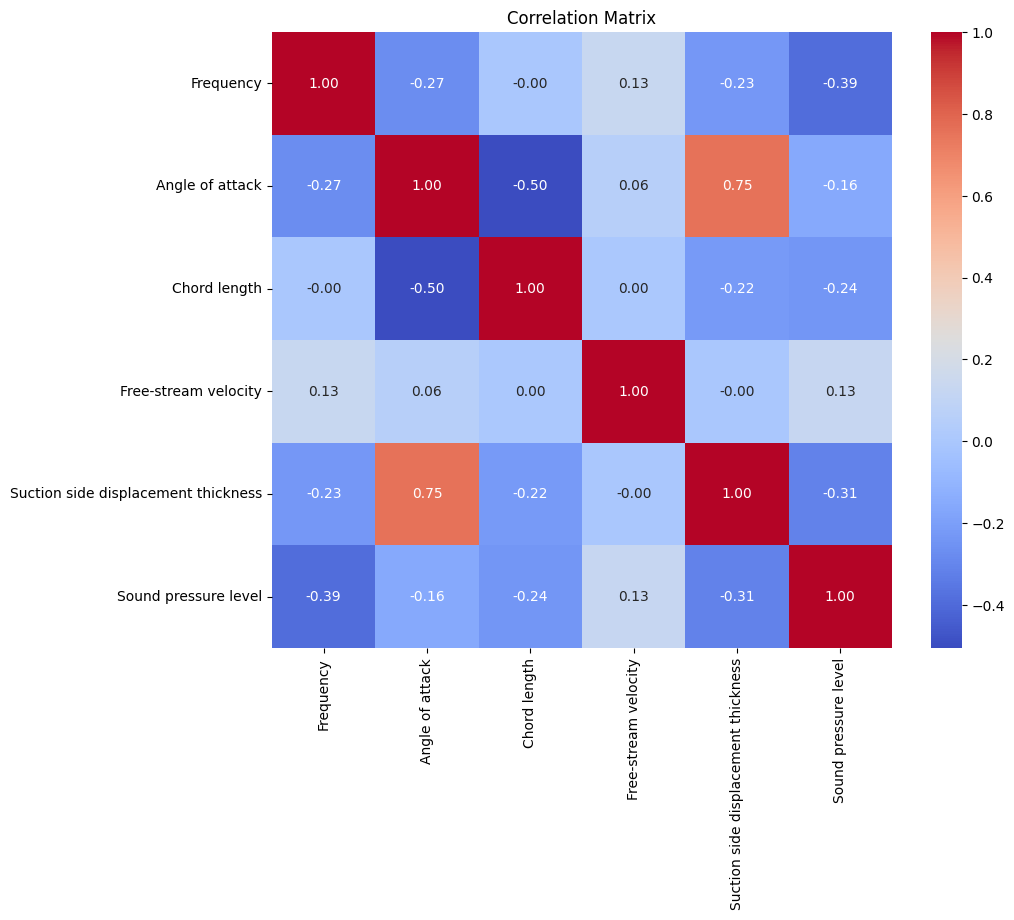

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

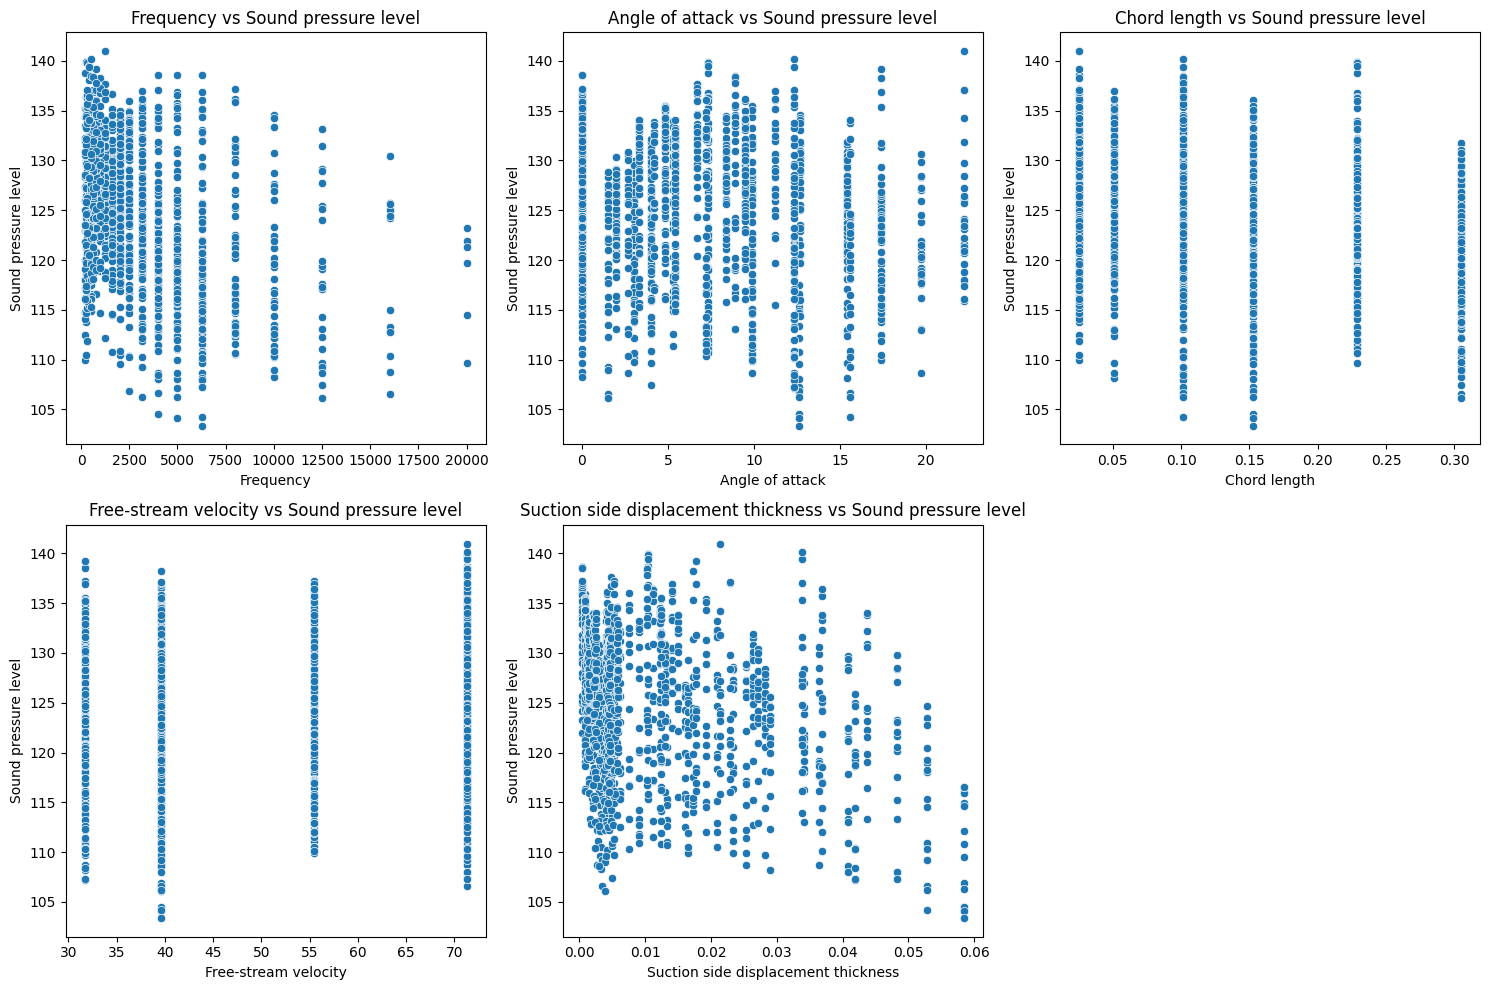

In [31]:
features = [
    "Frequency",
    "Angle of attack",
    "Chord length",
    "Free-stream velocity",
    "Suction side displacement thickness"
]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y="Sound pressure level")
    plt.title(f"{feature} vs Sound pressure level")
plt.tight_layout()
plt.show()


In [32]:
duplicate_rows = df.duplicated().sum()
print(f"Дубликатов: {duplicate_rows}")

feature_columns = df.columns[:-1]

duplicates_by_features = df.duplicated(subset=feature_columns, keep=False)

contradictions = df[duplicates_by_features].sort_values(by=list(feature_columns))
print(f"Противоречивых записей: {len(contradictions)}")


Дубликатов: 0
Противоречивых записей: 0


In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

mask_no_outliers = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

print(f"Число выбросов по IQR: {(~mask_no_outliers).sum()}")
df_iqr_cleaned = df[mask_no_outliers]

z_scores = np.abs(zscore(df))
mask_no_outliers_z = (z_scores < 3).all(axis=1)

print(f"Число выбросов по Z-оценке: {(~mask_no_outliers_z).sum()}")
df_z_cleaned = df[mask_no_outliers_z]


Число выбросов по IQR: 240
Число выбросов по Z-оценке: 76


In [34]:
missing = df.isnull().sum()
print(f"Количество пропущенных значений:\n{missing}")
print(f"Всего пропущенных значений: {df.isnull().sum().sum()}")


Количество пропущенных значений:
Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Sound pressure level                   0
dtype: int64
Всего пропущенных значений: 0


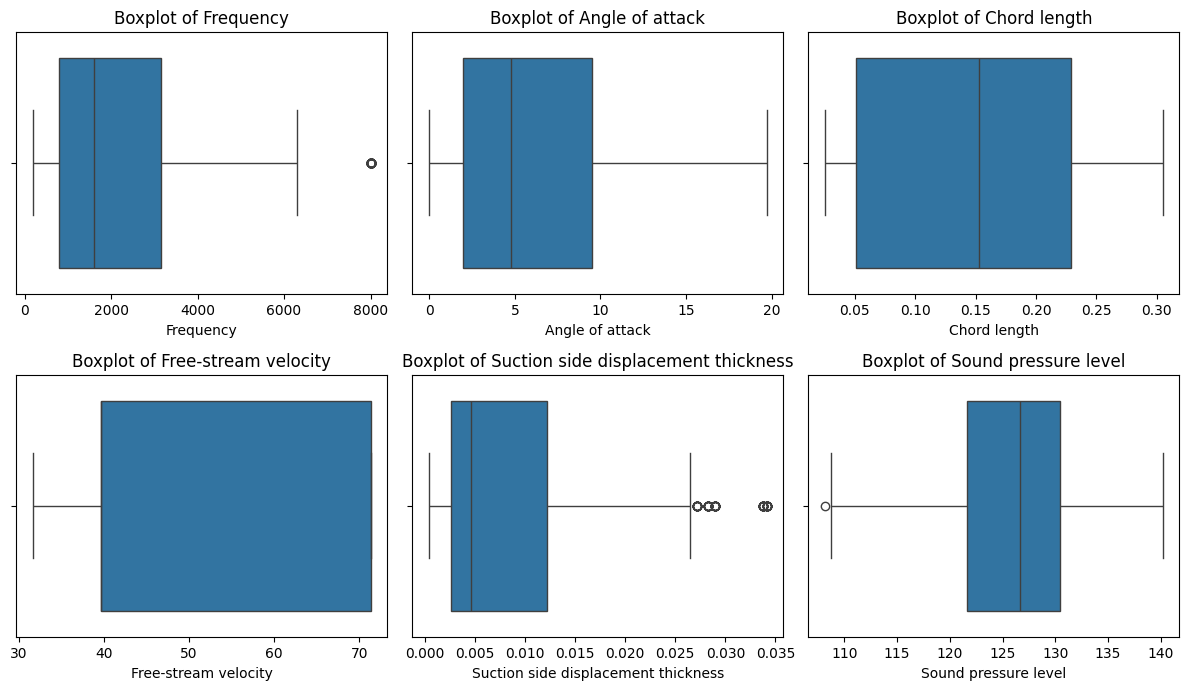

In [35]:
df = df_iqr_cleaned

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [36]:
X = df.drop("Sound pressure level", axis=1)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
y = df["Sound pressure level"].values.reshape(-1, 1)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

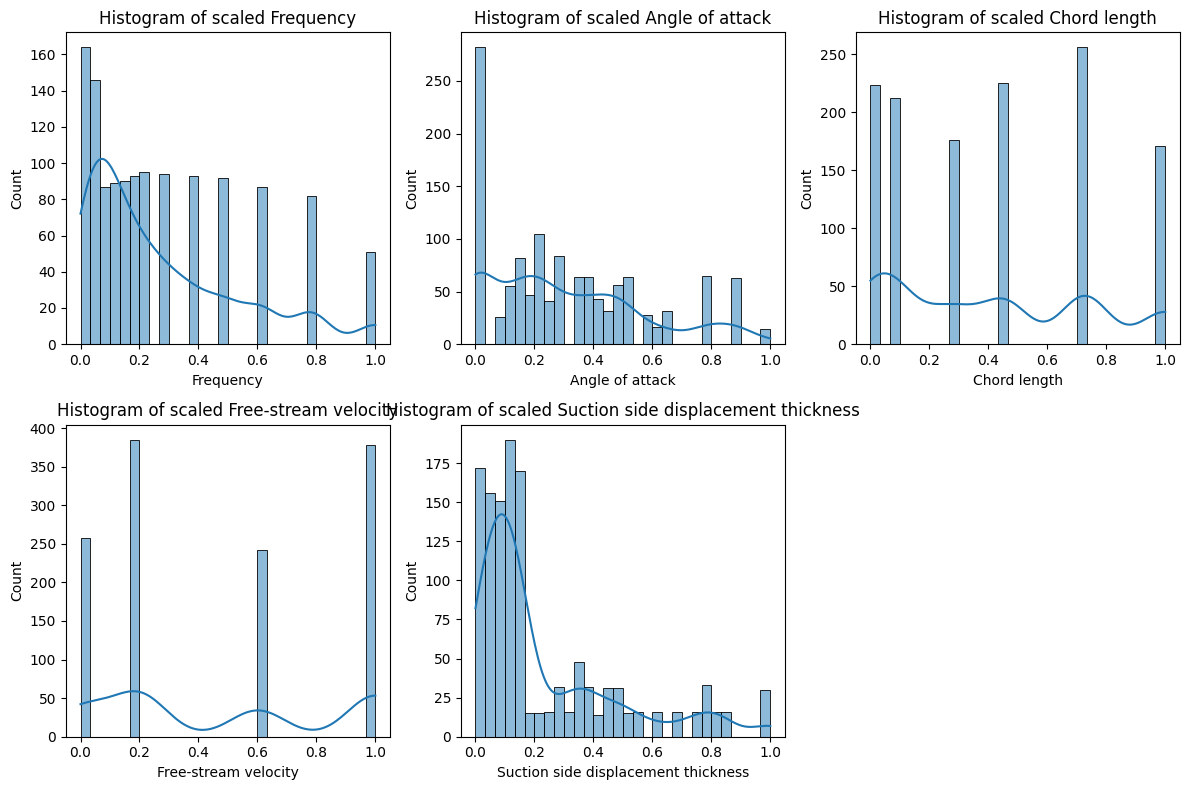

In [39]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

plt.figure(figsize=(12, 8))
for i, col in enumerate(X_scaled_df.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X_scaled_df[col], bins=30, kde=True)
    plt.title(f"Histogram of scaled {col}")
plt.tight_layout()
plt.show()

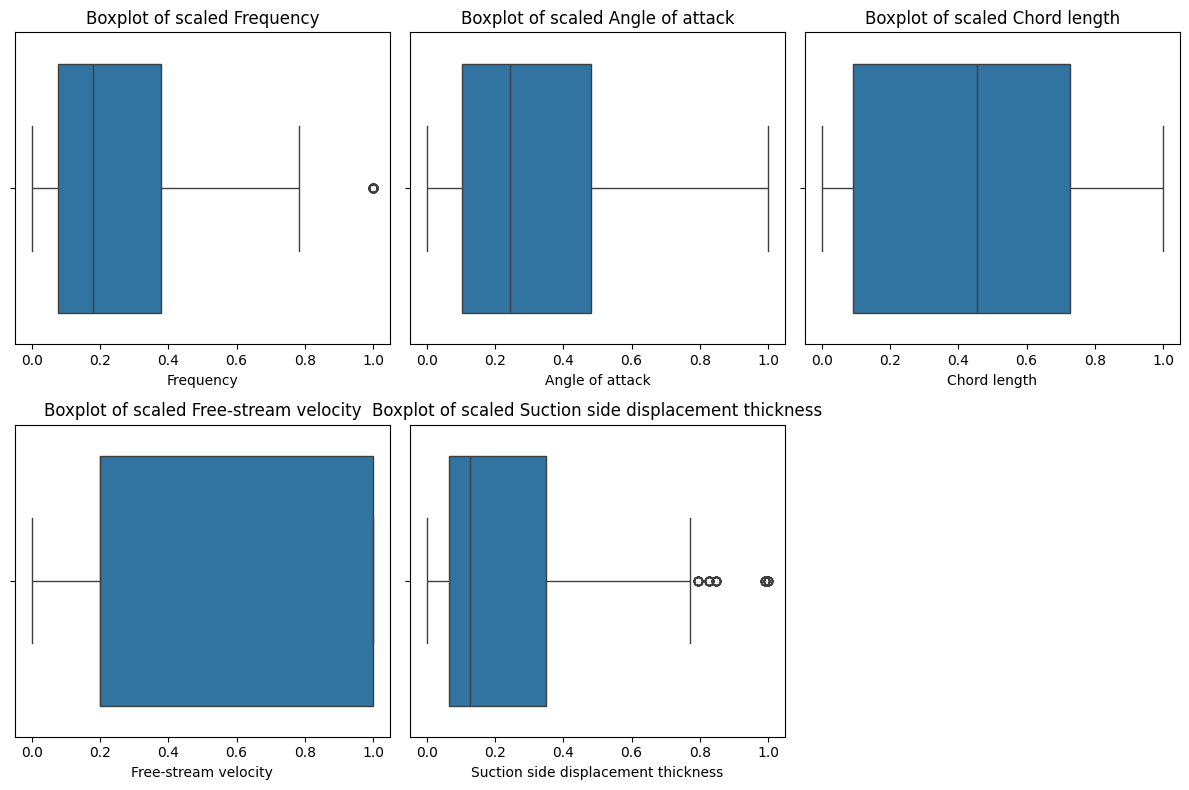

In [40]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_scaled_df.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=X_scaled_df[col])
    plt.title(f"Boxplot of scaled {col}")
plt.tight_layout()
plt.show()


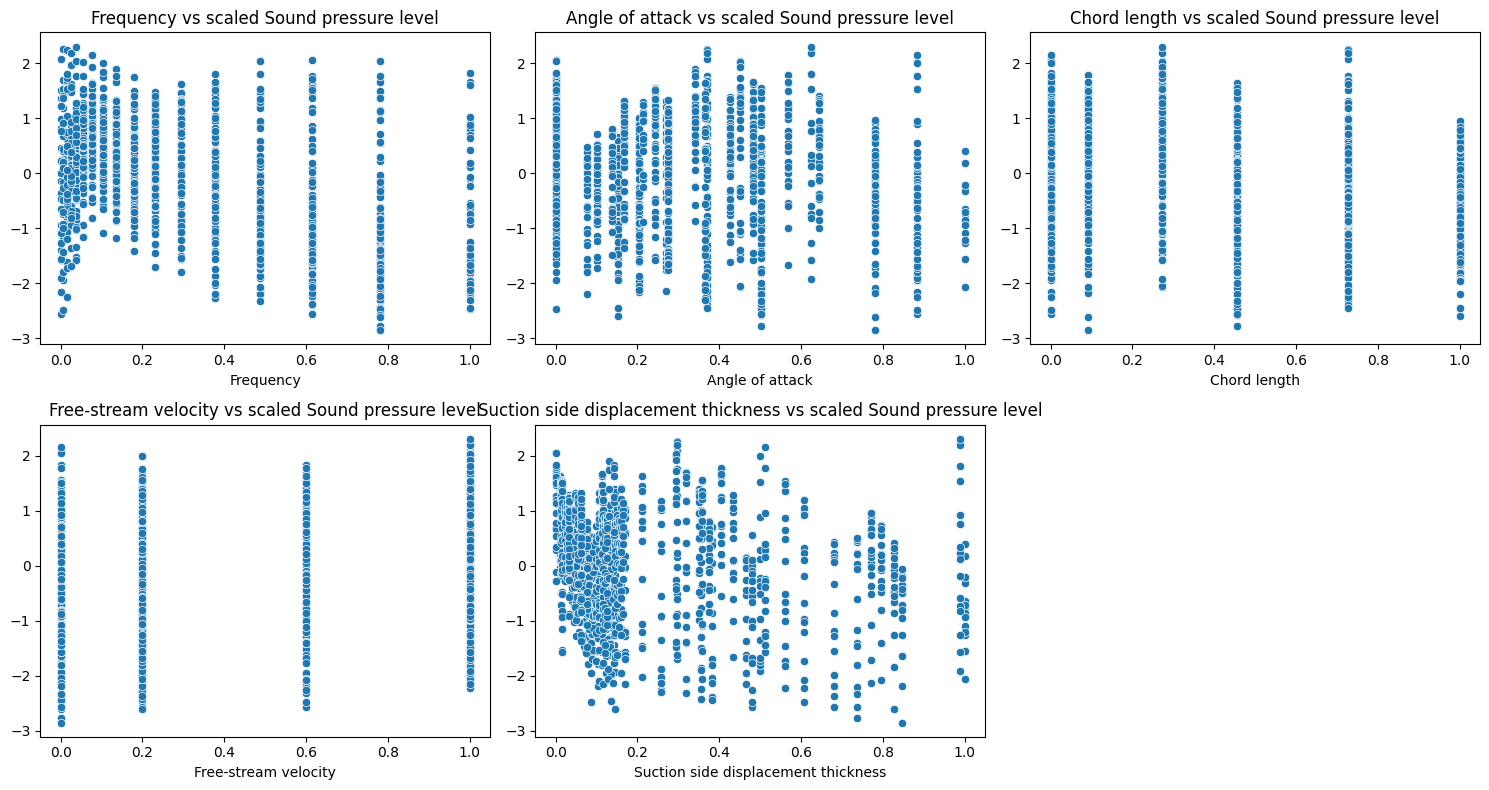

In [41]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(X_scaled_df.columns[:5]):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=X_scaled_df[col], y=y_scaled.flatten())
    plt.title(f"{col} vs scaled Sound pressure level")
plt.tight_layout()
plt.show()


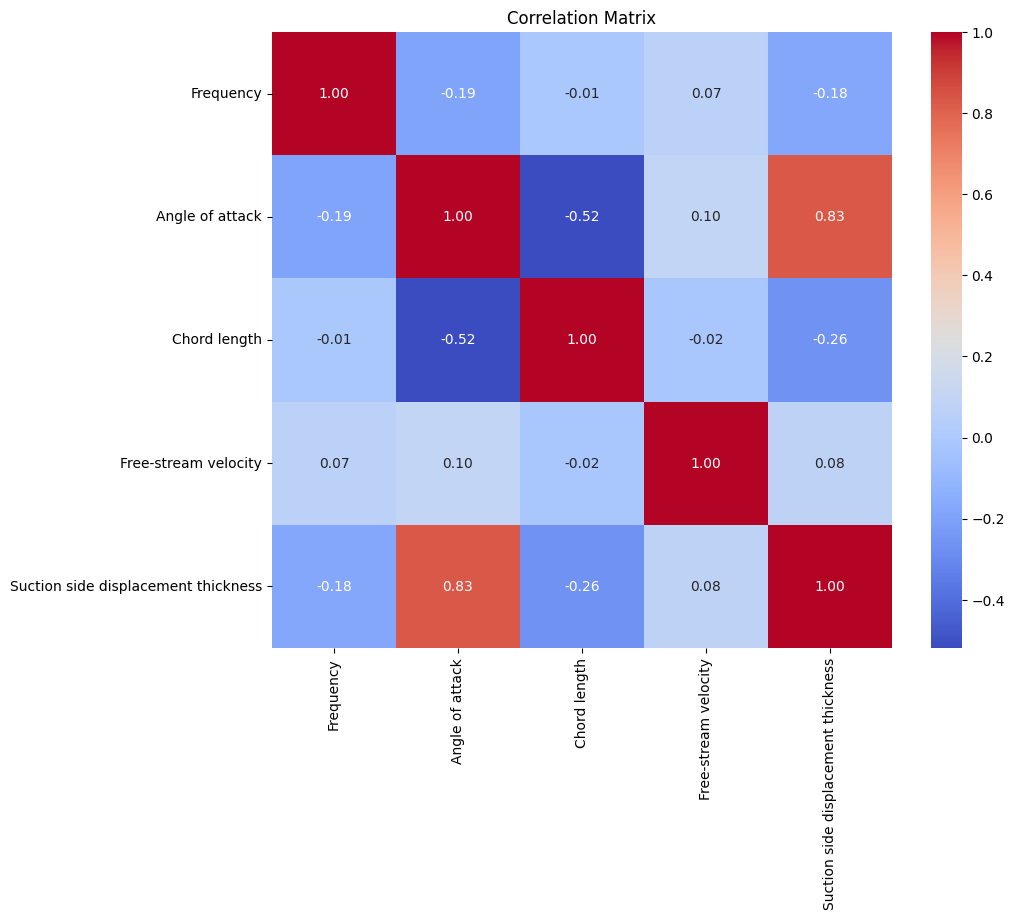

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

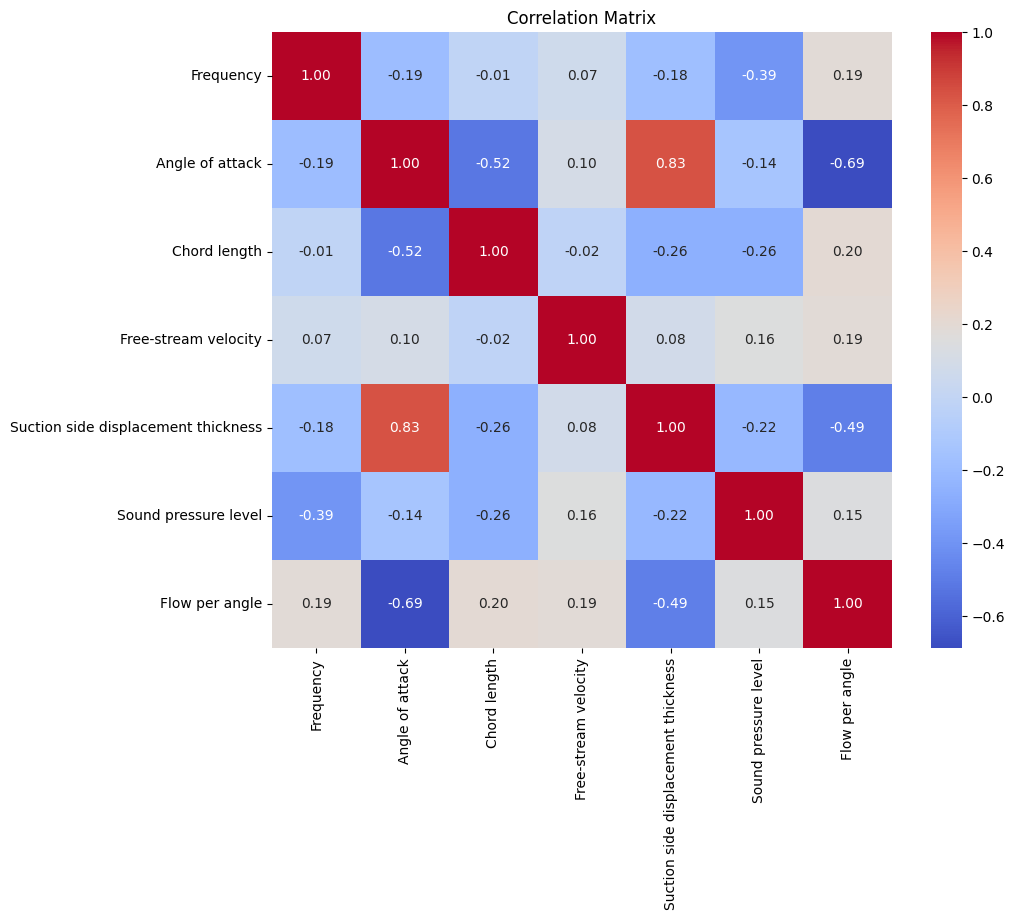

In [44]:
# Добавляем признак: угловая плотность потока
# Добавляем 1 к знаменателю, чтобы избежать деления на 0
df["Flow per angle"] = df["Free-stream velocity"] / (df["Angle of attack"] + 1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()